# ASSIGNMENT2 :

# Predict automobile price using Machine Learning

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv('AutoData (1).csv')
car.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car.shape

(205, 25)

In [4]:
car.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#  EDA

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

All the collumns have 205 non null values, so there are no missing values in this dataset. 
we have 15 numerical columns and 10 categorical columns

In [6]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


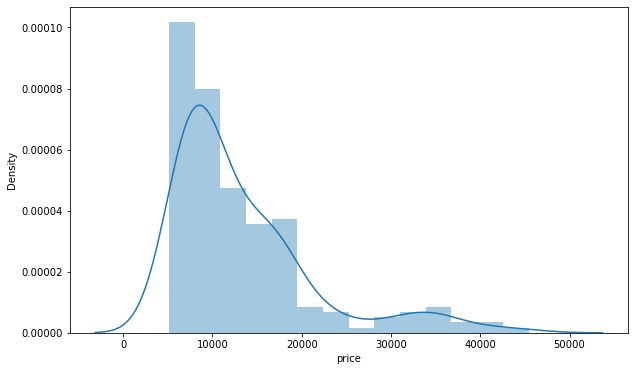

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(car.price);

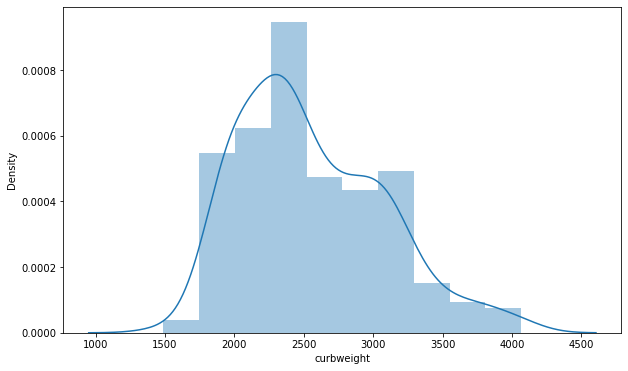

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(car.curbweight);

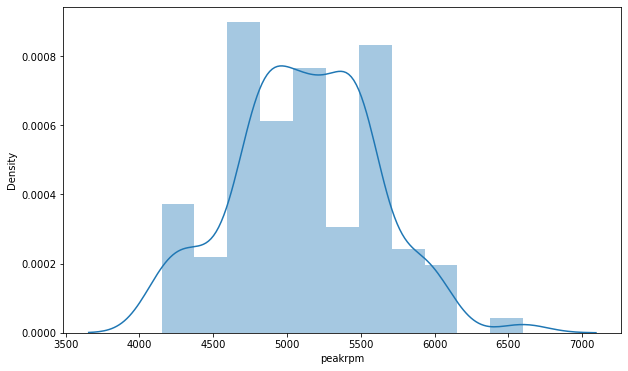

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(car.peakrpm);

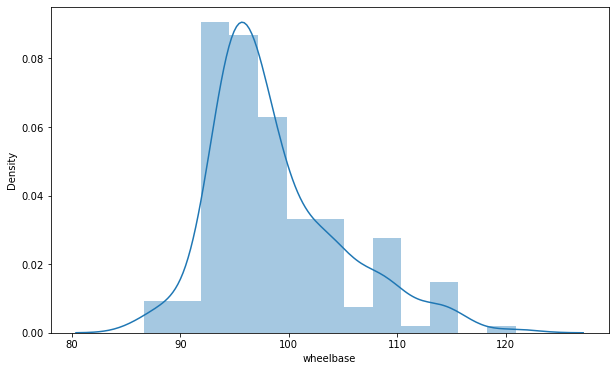

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(car.wheelbase);

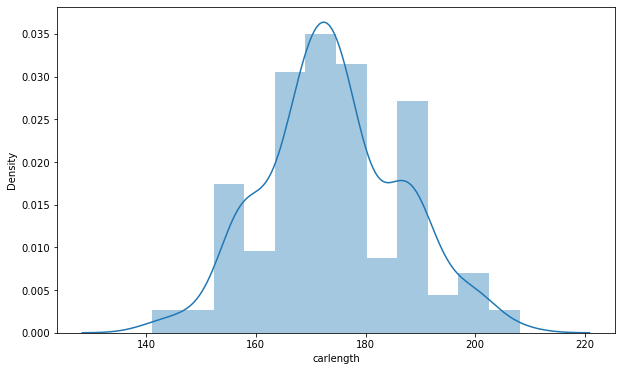

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(car.carlength);

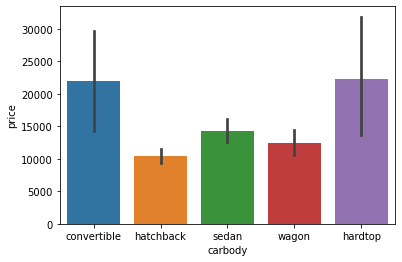

In [12]:
sns.barplot(x='carbody',y='price',data=car);

carbody: Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

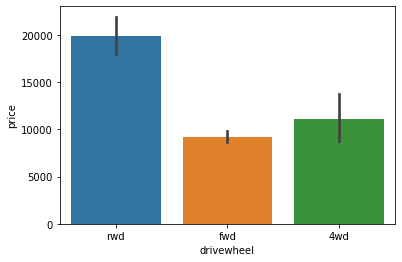

In [13]:
sns.barplot(x='drivewheel',y='price',data=car)

drivewheel: Cars with Rear wheel drive have a higher price value.

In [14]:
#A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.
car['mileage'] = car['citympg']*0.55 + car['highwaympg']*0.45

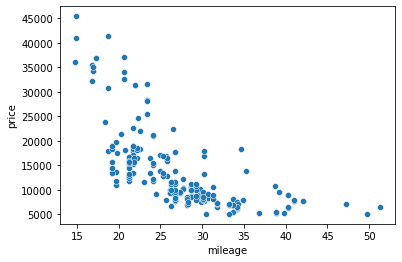

In [15]:
# Lets see how price varies with mileage. 
sns.scatterplot(x='mileage',y='price',data=car);

Mileage: Mileage has a negative correlation with price.

In [16]:
car['make']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: make, Length: 205, dtype: object

It is observed that Car Name consists of two parts 'car company' + ' ' + 'Car Model' Let's split out car company to a new column.

In [17]:
car['brand'] = car.make.str.split(' ').str.get(0).str.upper()

In [18]:
car[['make', 'brand']]

,make,brand
0,alfa-romero giulia,ALFA-ROMERO
1,alfa-romero stelvio,ALFA-ROMERO
2,alfa-romero Quadrifoglio,ALFA-ROMERO
3,audi 100 ls,AUDI
4,audi 100ls,AUDI
...,...,...
200,volvo 145e (sw),VOLVO
201,volvo 144ea,VOLVO
202,volvo 244dl,VOLVO
203,volvo 246,VOLVO


In [19]:
len(set(car.brand.values))

27

# simple regression model 1:

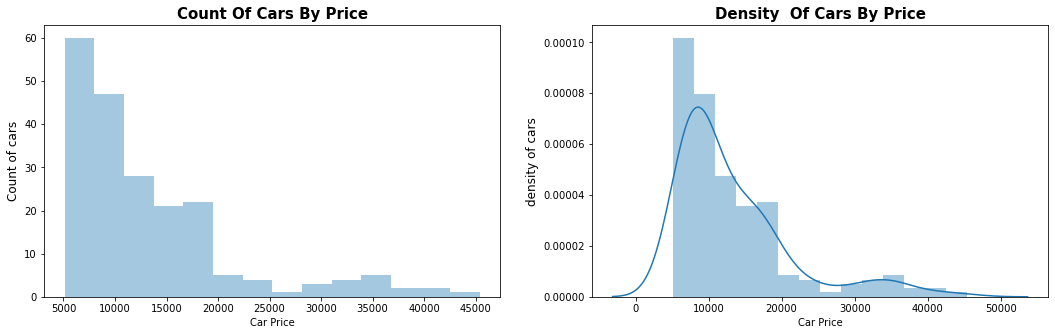

In [20]:
# target variable: price of car

fig, ax= plt.subplots(1,2,figsize=(18,5))

sns.distplot(car['price'], norm_hist=False, kde=False, ax=ax[0])
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(car['price'], kde=True, ax=ax[1])
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('density of cars',size=12)
ax[1].set_title('Density  Of Cars By Price',size=15,weight="bold");

<b>Observations on Target Variable- Price:

1. The target variable price has a positive skew, however majority of the cars are low priced.

2. More than 50% of the cars (around 105-107 out of total of 205) are priced 10,000 and close to 35% cars are priced between 10,000 and 20,000. So around 85% of cars in US market are priced between 5,000 to 20,000.

3. Based on above observations and graph on right side (KDE/green one) it appears there are 2 distributions one for cars priced between 5,000 and 25000 and another distribution for high priced cars 25,000 and above. (Notice the approximate bell curve from little less than 30000 upto 45,000/50,000)

To perform linear regression, the target variable should be linearly related to independent variables. Let's see whether that's true in this case.

In [21]:
#creating df  with numeric var's only
car_numeric= car.select_dtypes(include=['float64','int64'])
car_numeric.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


<Figure size 1440x720 with 0 Axes>

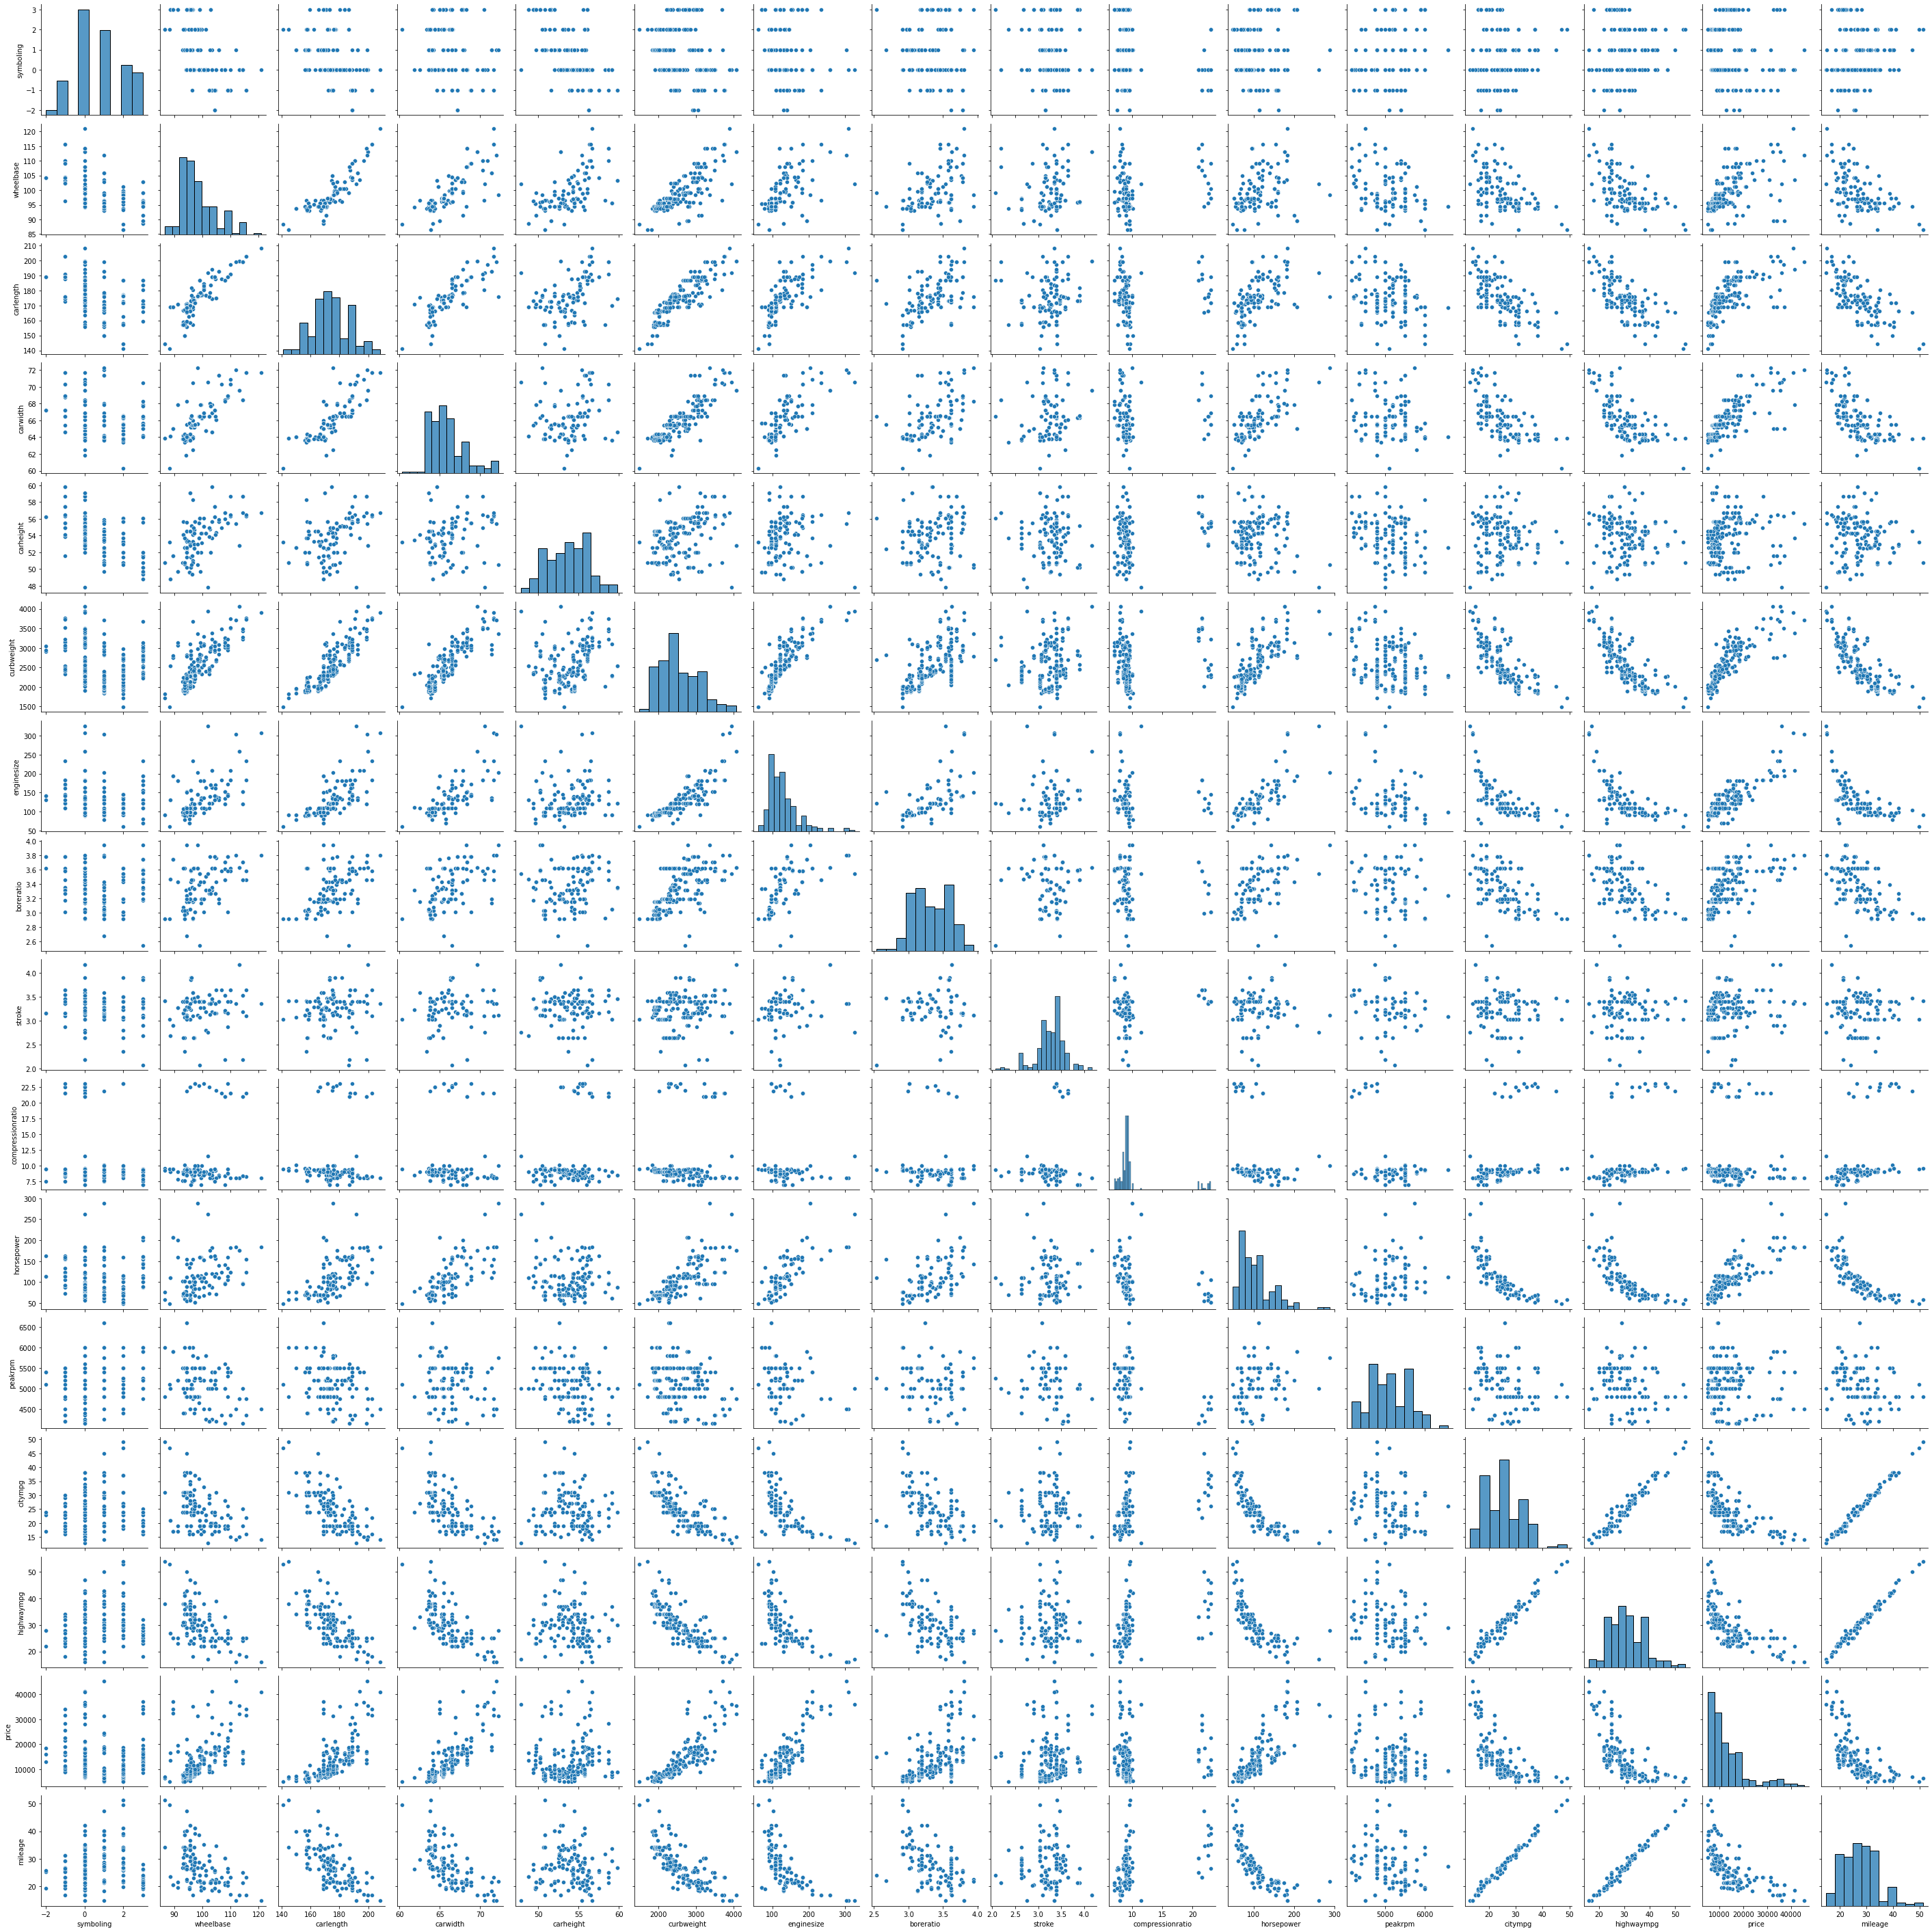

In [22]:
# pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(car_numeric);

as we can see its difficult to interpret these graphs due to so many of them a BETTER way of checking linearity is in below cell

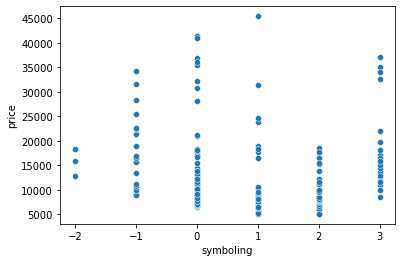

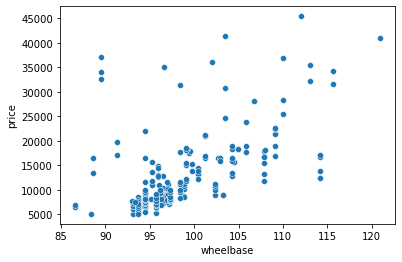

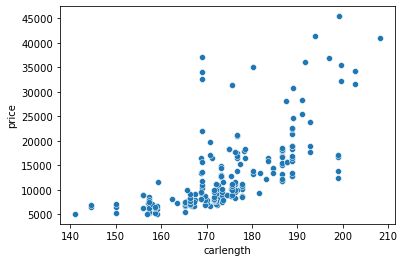

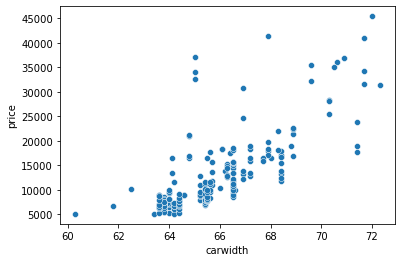

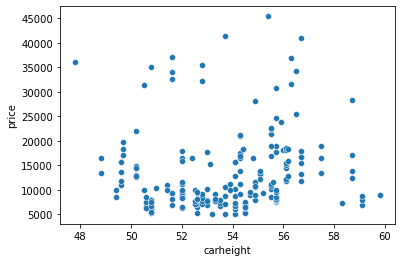

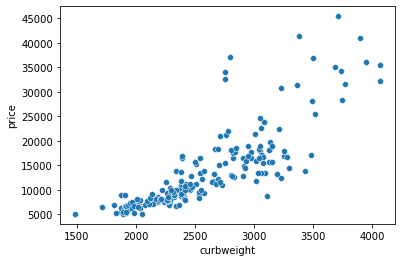

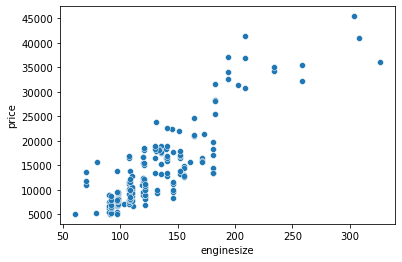

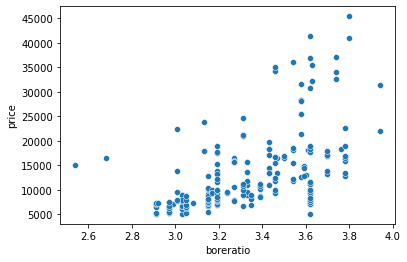

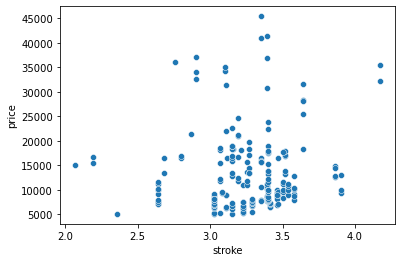

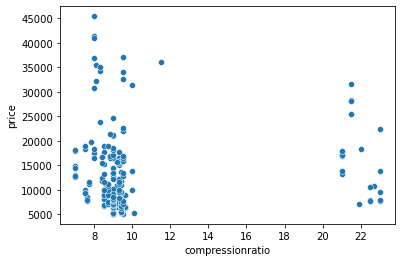

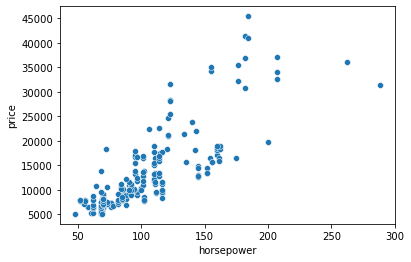

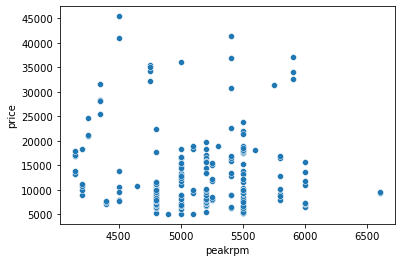

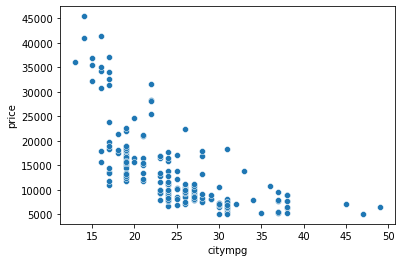

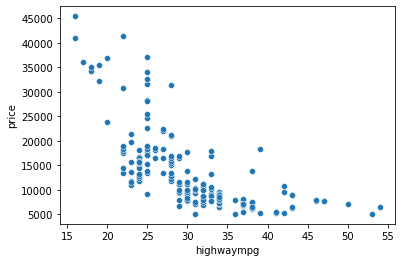

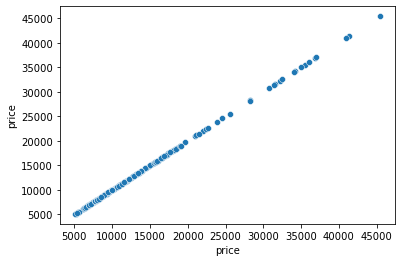

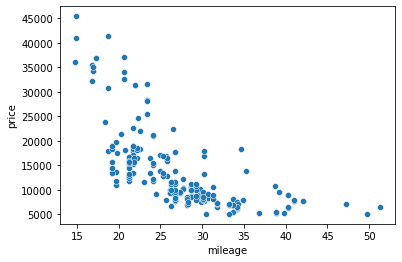

In [23]:
#LINEARITY CHECK>>>#to check price has linear relation or not with Indep. var's

for i, col in enumerate (car_numeric.columns):
    plt.figure(i)
    sns.scatterplot(x=car_numeric[col],y=car_numeric['price'])


These var's appears to have a linear relation with price: carwidth, curbweight, enginesize, horsepower, boreration and citympg.

Other variables either don't have a relation with price or relationship isn't strong. None of the varibales appear to have polynomial relation with price.

In linear regression assumptions validation section we will check for linearity assumption in detail

<AxesSubplot:>

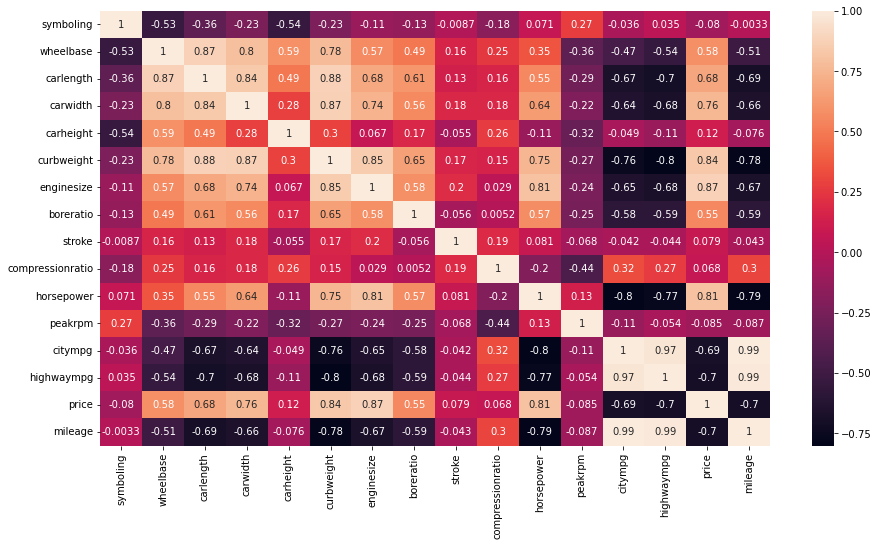

In [24]:
#CREATING CORELATION MATRIX TO DECIDE WHAT TO choose
corr=car_numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

# Useful insights

<b>1.Dependent var and indep. var's

Positive corr: Price highly correlated with enginesize, curbweight, horsepower, carwidth (all of these variables represent the size/weight/engine power of the car)

Negative corr: Price negatively corr with mpg (miles per gallon) var's citympg highwaympg and Mileage. 
This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg


<b>2. Correlation among independent variables:

Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

Since indep. var's are highly correlated (more than 80% corr among many of them ) we'll have to pay attention to multicollinearity, which we will check in assumptions validation section using VIF score.

# Liner Regression Model 1

In [25]:
x=car['enginesize']
y=car['price']

SPLITING TEST TRAIN DATASET

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state =31)

In [27]:
x_train.head()

88     110
74     304
189    109
173    122
48     258
Name: enginesize, dtype: int64

In [28]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [29]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [30]:
print(reg.intercept_)
print(reg.coef_)

[-8008.74723113]
[[167.29904396]]


Take Away

THUS THE LINEAR LINE EQUATION IS Y=MX+C THUS y=167x+(-8008) equation of linear line. with M=167(APPROX) AND C=--8008(APPROX)

R VALUE WHILE TRAINING:
0.7707390596714485


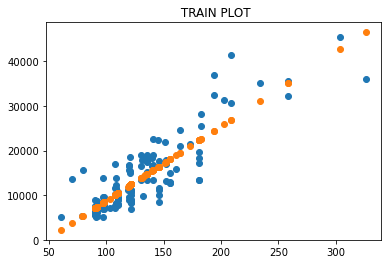

In [31]:
#This is the R2 Score of the test data set 

y_pred_train=reg.predict(x_train)

print("R VALUE WHILE TRAINING:")
print(r2_score(y_train,y_pred_train))

#Plotting scatter graph 
plt.scatter(x = x_train,y= y_train)
plt.scatter(x=x_train,y= y_pred_train)
plt.title(" TRAIN PLOT")
plt.show()

# Build model using best variable and report the R2

R VALUE WHILE TESTING:
0.745489690086427


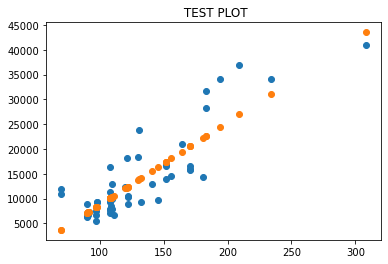

In [32]:
#This is the R2 Score of the train data set 
y_test_pred=reg.predict(x_test)
print("R VALUE WHILE TESTING:")
print(r2_score(y_test,y_test_pred))

plt.scatter(x = x_test,y= y_test)
plt.scatter(x=x_test,y= y_test_pred) 
plt.title(" TEST PLOT")
plt.show()

There is alot of outliers in here but we can always make use of R2 square

# MULTIPLE REGRESSION MODEL:2

 ## 1 Applying the feature selection approaches as discussed in the class:

In [33]:
car['carbody']

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: carbody, Length: 205, dtype: object

In [34]:
#using get_dummies fuction as it will convert catagorical variables as understoodable and numerical
data_carbody =pd.get_dummies(car.carbody)
data_carbody

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [35]:
# We will need N-1 dummies

data_carbody =pd.get_dummies(car.carbody,prefix='body',drop_first=True,)
data_carbody

,body_hardtop,body_hatchback,body_sedan,body_wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
200,0,0,1,0
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


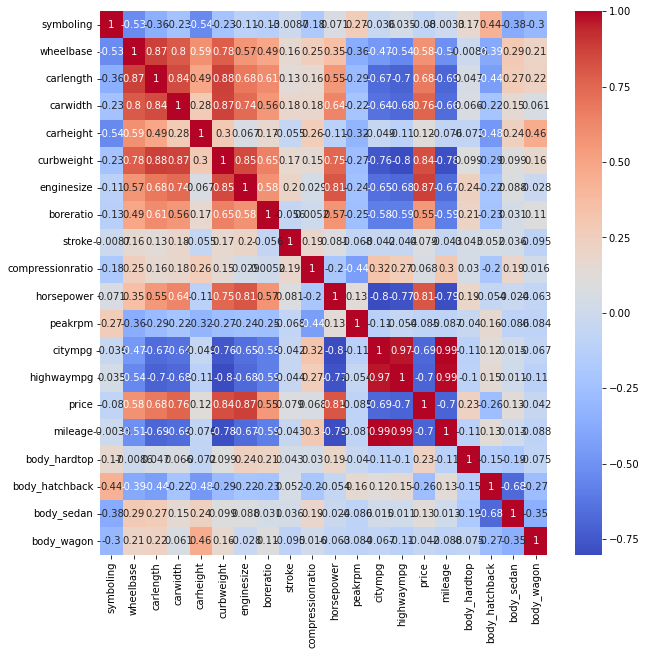

In [36]:
# Creating a Heat Map to get the correlation measure between the variables:
data_sample =pd.concat([car,data_carbody],axis=1)
correlation=data_sample.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap = 'coolwarm')
plt.show()


In [37]:
data_sample.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,peakrpm,citympg,highwaympg,price,mileage,brand,body_hardtop,body_hatchback,body_sedan,body_wagon
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,5000,21,27,13495.0,23.70,ALFA-ROMERO,0,0,0,0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,5000,21,27,16500.0,23.70,ALFA-ROMERO,0,0,0,0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,5000,19,26,16500.0,22.15,ALFA-ROMERO,0,1,0,0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,5500,24,30,13950.0,26.70,AUDI,0,0,1,0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,5500,18,22,17450.0,19.80,AUDI,0,0,1,0


In [38]:
list(data_sample.select_dtypes(include ='object'))

['make',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand']

In [39]:
# The categorical Data is not needed, so dropping all of it as follows:
Numerical_data = data_sample.drop(['symboling','make','fueltype','fuelsystem','brand','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber'], axis=1)

In [40]:
Numerical_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,body_hardtop,body_hatchback,body_sedan,body_wagon
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,25.25,0,0,1,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,21.70,0,0,1,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,20.25,0,0,1,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,26.45,0,0,1,0


In [41]:
X=Numerical_data.drop(columns=['price'])
Y=Numerical_data.price

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state =31)
reg= LinearRegression()
reg.fit(X_train,Y_train)
multi_model = LinearRegression()
multi_model.fit (X_train,Y_train)
#print(multi_model.intercept_)
#print(multi_model.coef_)

Y_pred_train =multi_model.predict(X_train)

Y_pred_test =multi_model.predict(X_test)


print("Mean-Squared-Error of training data:{}".format(mean_squared_error(Y_train,Y_pred_train)))
print("R-sqaure of training data: {}".format(r2_score(Y_train, Y_pred_train)))

print("Mean-Squared-Error of  test data:{}".format(mean_squared_error(Y_test,Y_pred_test)))
print("R-sqaure of  test data: {}".format(r2_score(Y_test, Y_pred_test)))


Mean-Squared-Error of training data:8031946.209167749
R-sqaure of training data: 0.8672189034770797
Mean-Squared-Error of  test data:10441237.230651269
R-sqaure of  test data: 0.8545114970715069


# Conclusion

### What is your understanding of the factors that drive price?

### ACCOURDING TO THE MODELS R VALUES FOR

LINER REGRESSION MODEL 1 WHILE TRAINING: 0.7707390596714485 

LINER REGRESSION MODEL 1 WHILE TESTING: 0.745489690086427

MULTIPLE REGRESSION MODEL 2 on train data :0.8672189034770797

MULTIPLE REGRESSION MODEL 2 on test data :  0.8545114970715069

#### FROM THE R VALUES OF BOTH THE MODEL IT IS CLEAR THAT MULTIPLE REGRESSION MODEL 2 IS CLEARLY BETTER.

#### THUS WE CAN NOW FINALLY STATE THAT THE PRICE OF THE CAR IS NOT JUST DEPENDING ON ONE INDEPENDENT VARIABLE IT'S LINEARLY DEPENDENT TO MULTIPLE INDEPENDENT VARIABLES